# Import Basic Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the train & test data.

In [ ]:
train = pd.read_csv('/content/train_0OECtn8.csv')

In [ ]:
test = pd.read_csv('/content/test_1zqHu22.csv')

## Top 5 Rows (train and test)

In [ ]:
train.head(5)

In [ ]:
test.head()

## Variable data type

In [ ]:
train.info()

In [ ]:
test.info()

## Dataset Shape (Number of sample and variable)

In [ ]:
print(f'\n Train Contains {train.shape[0]} sample and {train.shape[1]} Variable')
print(f'\n Train Contains {test.shape[0]} sample and {test.shape[1]} Variable')

featurs = [ c for c in train.columns if c not in ['engagement_score'] ]
print(f'\n The dataset contain {(len(featurs))} featurs ')

#Target Distribution (engagement_score)

In [ ]:
plt.figure(figsize=(12,6))
sns.kdeplot(train['engagement_score'],shade=True,color='red');

# Boxplot (engagement_score)

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x=train['engagement_score'],color='orange');

Target Distribution (engagement_score) not normaly distriribute (left skewed)

## Converting log (engagement_score)

In [ ]:
train['engagement_scorelog'] = np.log(train['engagement_score'])

In [ ]:
plt.figure(figsize=(12,6))
sns.kdeplot(train['engagement_scorelog'],shade=True,color='#DC143C');

## Boxplot after coverting log(engagement_score)

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x=train['engagement_scorelog'],color='#EE1289');

In [ ]:
train.drop('engagement_scorelog',axis='columns', inplace=True)

## Check Missing values in this data

In [ ]:
train.isnull().sum().sort_values(ascending=False)

In [ ]:
test.isnull().sum().sort_values(ascending=False)

No null values in this data

## unique values in object category

In [ ]:
train.nunique()

In [ ]:
test.nunique()

## Univariate Analysis

### 1.Gender

In [ ]:
train['gender'].unique()

In [ ]:
train['gender'].value_counts()

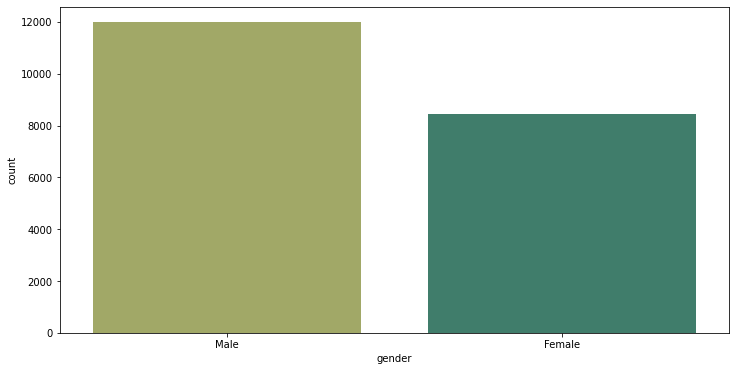

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x ='gender', data = train,palette='gist_earth_r');

In [ ]:
data = [52397,36800]
labels = ['Male', 'Female']

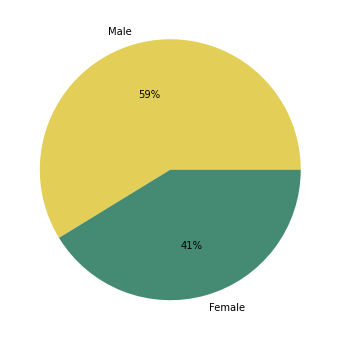

In [ ]:
plt.figure(figsize=(12,6))
plt.pie(data, labels = labels,autopct='%.0f%%',colors=['#E3CF57','#458B74'])
plt.show()

### 2.Profession

In [ ]:
train['profession'].unique()

array(['Student', 'Working Professional', 'Other'], dtype=object)

In [ ]:
train['profession'].value_counts()

Student                 10212
Other                    6169
Working Professional     4065
Name: profession, dtype: int64

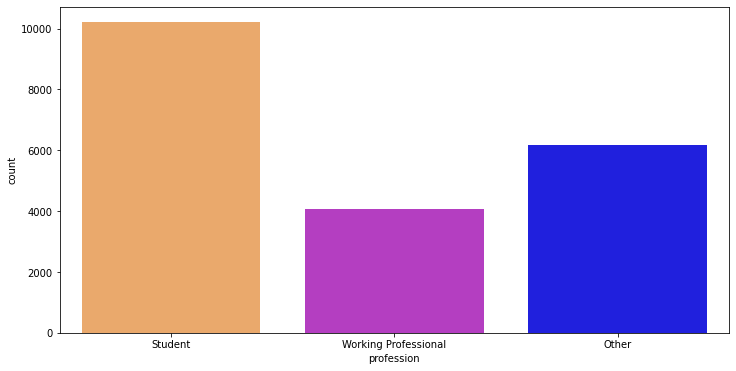

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x ='profession', data = train,palette='gnuplot2_r',color="salmon");

In [ ]:
data = [44638,26840,17719]
labels = ['Student','Other','Working Professional']

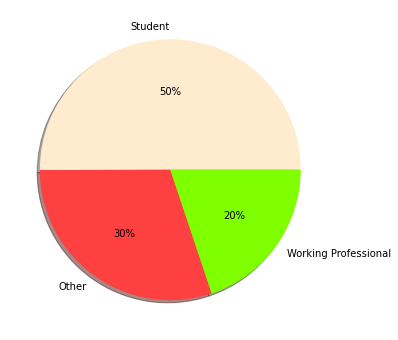

In [ ]:
plt.figure(figsize=(12,6))
plt.pie(data,labels = labels,autopct='%.0f%%',colors=['#FFEBCD','#FF4040','#7FFF00'],shadow=True)
plt.show()

## histogram (category_id)

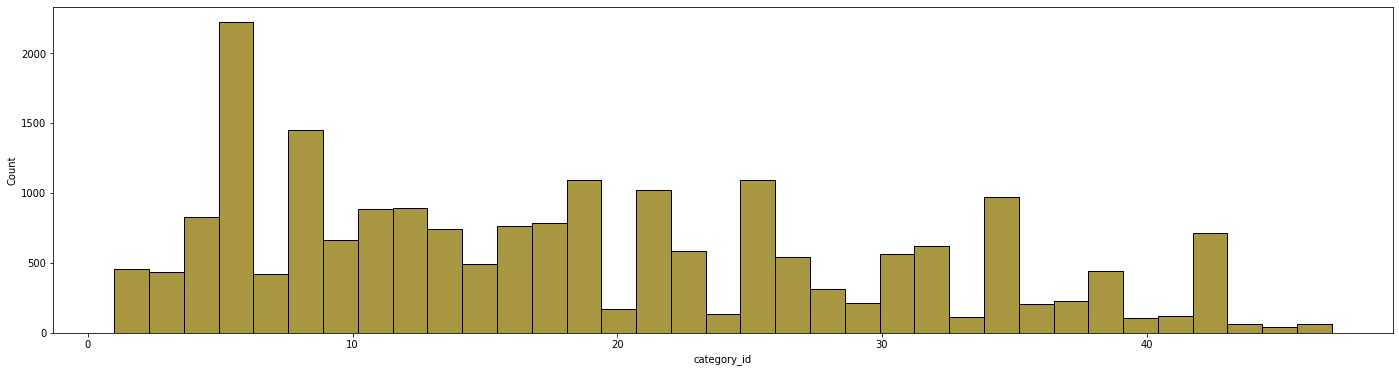

In [ ]:
plt.figure(figsize=(24,6))
sns.histplot(data=train, x="category_id",palette='binary_r',color='#8B7500');

## Histogram (video_id)



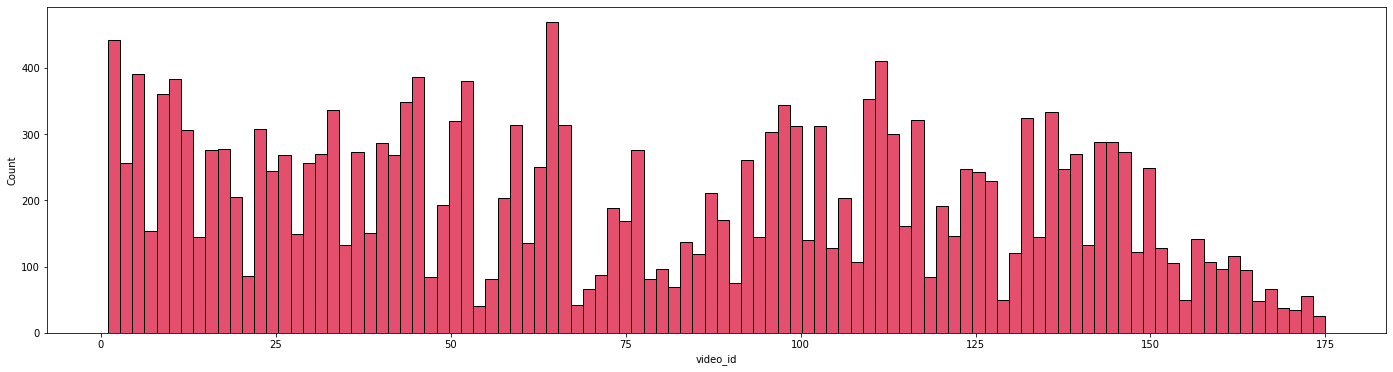

In [ ]:
plt.figure(figsize=(24,6))
sns.histplot(data=train, x="video_id",palette='binary_r',color='#DC143C',bins=100);

## 3.Followers

## boxplot (age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


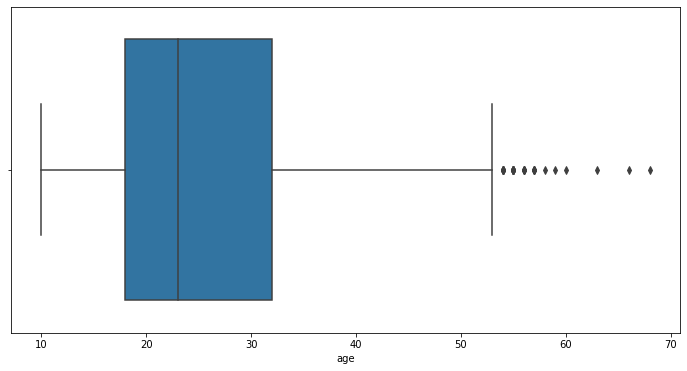

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(train["age"])
plt.show();

Because of the Outliers to the maximum side, here we transormed by using log.

In [ ]:
train['age'] = np.log(train['age'])

In [ ]:
test['age'] = np.log(test['age'])

## After log Transformation (age)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


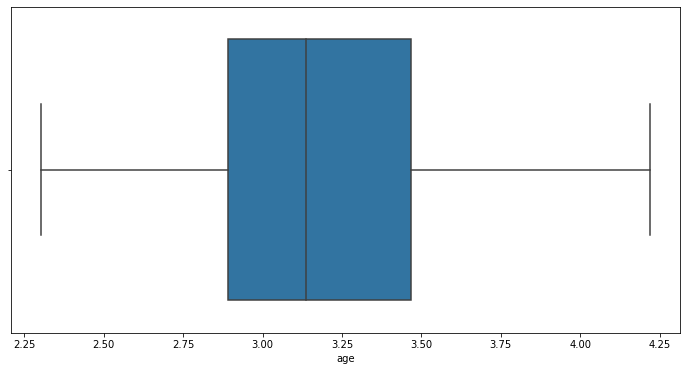

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(train["age"])
plt.show();

## boxplot (followers)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


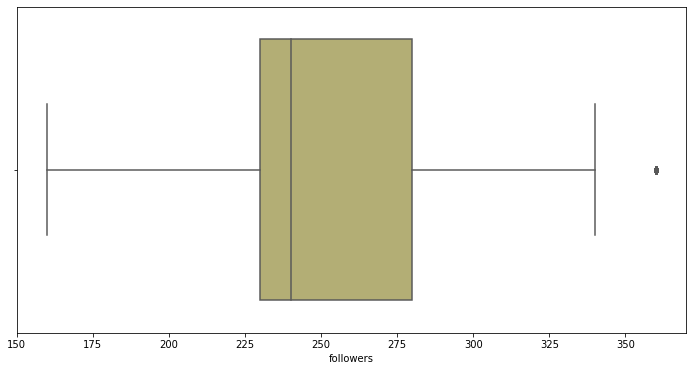

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(train["followers"],color='#BDB76B')
plt.show();

## boxplot (views)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


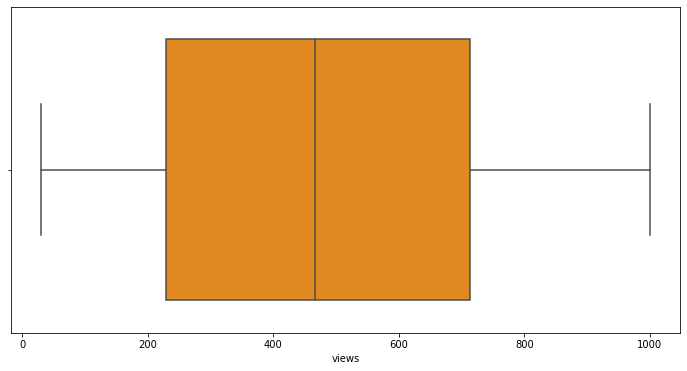

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(train["views"],color="#FF8C00")
plt.show();

# Bivariate Analysis

Barplot (category_id VS engagement_score)

In [ ]:
plt.figure(figsize=(24,6))
sns.barplot(x="category_id", y="engagement_score", data=train,palette="gist_rainbow")

## Barplot (Profession VS Engagement_score)

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="profession", y="engagement_score", data=train,palette="cubehelix_r")

## Barplot (Gender VS engagement_score)

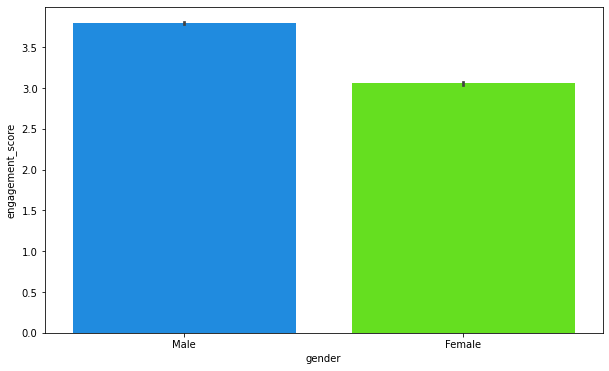

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x="gender", y="engagement_score", data=train,palette="gist_rainbow_r")

## Multivariant Analysis

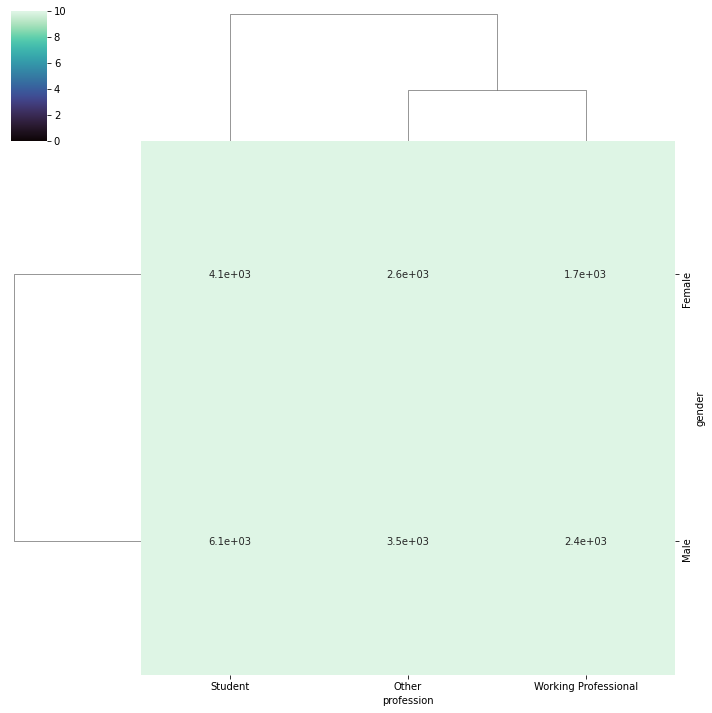

In [ ]:
#plt.figure(figsize=(1,1))
sns.clustermap(pd.crosstab(train['gender'],train['profession']),annot=True,cmap="mako", vmin=0, vmax=10)

# heatmap (correlation matrix )

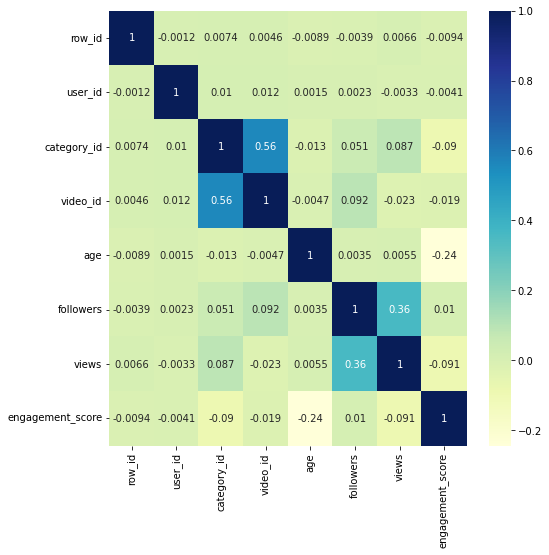

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(train.corr(),annot=True,linecolor='GREEN', cmap="YlGnBu")

# Hypothesis testing

# Anova test (Profession VS Engagement_score)

In [ ]:
from scipy.stats import f_oneway 

In [ ]:
train.engagement_score.groupby(train.profession).mean()

profession
Other                   3.330631
Student                 3.751657
Working Professional    3.079665
Name: engagement_score, dtype: float64

In [ ]:
train.engagement_score.groupby(train.profession).var()

profession
Other                   0.673638
Student                 0.679341
Working Professional    0.644126
Name: engagement_score, dtype: float64

In [ ]:
rating1=train[train.profession=="Other"]
rating2=train[train.profession=="Student"]
rating3=train[train.profession=="Working Professional"]

In [ ]:
f_oneway(rating1.engagement_score,rating2.engagement_score,rating3.engagement_score)


# pvalue=0.0  < 0.05 Reject Null hypothises

F_onewayResult(statistic=nan, pvalue=nan)

# Chi-squared test (Gender VS Profession)


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
chi2_contingency(pd.crosstab(train.gender,train.profession))

(10.765770575409416,
 0.004594546199393704,
 2,
 array([[2551.96136164, 4224.44957449, 1681.58906388],
        [3617.03863836, 5987.55042551, 2383.41093612]]))

#### Test  Association between gender and profession p values= 0.16593  > 0.05

## T - Test

In [ ]:
train.engagement_score.groupby(train.profession).mean()

profession
Other                   3.330631
Student                 3.751657
Working Professional    3.079665
Name: engagement_score, dtype: float64

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
rating5=train[train.gender=="Male"]
rating6=train[train.gender=="Female"]

In [ ]:
ttest_ind(rating5.engagement_score,rating6.engagement_score,equal_var=False)

# pvalue=0.0  < 0.05 Reject Null hypothises

Ttest_indResult(statistic=nan, pvalue=nan)

## Numerical variable (count(no of row),mean,std,min,25% values,50% values,75% values)

In [ ]:
train.describe()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
count,20446.000000,20446.000000,20446.000000,20446.000000,20446.000000,20446.000000,20446.000000,20445.000000
mean,10223.500000,13951.294728,18.298543,77.351511,3.149069,252.587303,503.297222,3.491041
std,5902.396138,7984.536904,11.654334,48.291093,0.364837,46.172628,268.172956,0.863648
min,1.000000,5.000000,1.000000,1.000000,2.302585,160.000000,30.000000,0.000000
25%,5112.250000,7072.250000,8.000000,34.000000,2.890372,230.000000,229.000000,2.940000
50%,10223.500000,14013.000000,16.000000,75.000000,3.135494,240.000000,467.000000,3.710000
75%,15334.750000,20855.750000,26.000000,117.000000,3.465736,280.000000,714.000000,4.160000
max,20446.000000,27734.000000,47.000000,175.000000,4.219508,360.000000,1000.000000,5.000000


## Drope unnecessary variable

In [ ]:
train.drop('row_id',axis='columns', inplace=True)

In [ ]:
test.drop('row_id',axis='columns', inplace=True)

## Required Library

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,19990,37,128,3.178054,Male,Student,180,1000,4.33
1,5304,32,132,2.639057,Female,Student,330,714,1.79
2,1840,12,24,2.944439,Male,Student,180,138,4.35
3,12597,23,112,2.944439,Male,Student,220,613,3.77
4,13626,23,112,3.295837,Male,Working Professional,220,613,3.13


In [ ]:
train.profession.value_counts()

Student                 10212
Other                    6169
Working Professional     4065
Name: profession, dtype: int64

## Feature Transformation (Handling Categorical Features,Feature Scaling)

In [ ]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',MinMaxScaler(),['user_id','followers','views']),
    ('tnf2',OrdinalEncoder(categories=[['Student','Other','Working Professional']]),['profession']),
    ('tnf3',OneHotEncoder(sparse=False,drop='first'),['gender','category_id','video_id'])
],remainder='passthrough')

In [ ]:
y=train['engagement_score']

In [ ]:
x=train.drop('engagement_score',axis=1)

In [ ]:
x=transformer.fit_transform(x)

In [ ]:
x.shape

(20446, 226)

In [ ]:
Xtest=transformer.transform(test)

In [ ]:
Xtest.shape

(11121, 226)

## LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg=LinearRegression()

In [ ]:
regmodel=reg.fit(x,y)

ValueError: ignored

In [ ]:
regmodel.score(x,y)

## LassoRegression

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
reg=LassoCV()

In [ ]:
regmodel=reg.fit(x,y)

In [ ]:
regmodel.score(x,y)

## DecisionTreeRegressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree=DecisionTreeRegressor()

In [ ]:
treemodel= tree.fit(x,y)

In [ ]:
treemodel.score(x,y)

## RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
RF=RandomForestRegressor()

In [ ]:
RFmodel=RF.fit(x,y)

In [ ]:
RFmodel.score(x,y)

In [ ]:
RFpredict=RFmodel.predict(x)

In [ ]:
RMSE=np.sqrt(np.sum((RFpredict-y)**2)/x.shape[0])

In [ ]:
RMSE

In [ ]:
RFtestpredict=RFmodel.predict(Xtest)

In [ ]:
len(RFtestpredict)

## GradientBoostingRegressor

In [ ]:
pd.DataFrame(RFtestpredict).to_csv("RANDOM_forest.csv")

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
GB=GradientBoostingRegressor()

In [ ]:
GBmodel=GB.fit(x,y)

In [ ]:
GBmodel.score(x,y)

In [ ]:
GBmodel=RFmodel.predict(x)

In [ ]:
RMSE=np.sqrt(np.sum((GBmodel-y)**2)/x.shape[0])

In [ ]:
RMSE

## KNeighborsRegressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn=KNeighborsRegressor(n_neighbors=5,weights='distance')

In [ ]:
knnmodel=knn.fit(x,y)

In [ ]:
knnmodel.score(x,y)

# RandomForestRegressor gives us best Result